In [1]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [6]:
X=iris.data
Y=iris.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)



In [10]:
import heapq
import scipy
Y_label=[]
for i in range(len(X_test)):
    X=np.array(X_test[i,:]).reshape(1,-1)
    ary = scipy.spatial.distance.cdist(X_train, X, metric='euclidean')
    indx=heapq.nsmallest(5, range(len(ary)), ary.take)
    Y_neighbors=[]
    for k in range(len(indx)):
        Y_neighbors.append(Y_train[indx[k]])
    Y_label.append(max(set(Y_neighbors), key = Y_neighbors.count))

In [12]:
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_label))
print(metrics.confusion_matrix(Y_test,Y_label))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [18]:
#Fine-Tune K
test_mse=[]
n_neighbors=[i for i in range(3,10)]
for j in range(len(n_neighbors)):
    Y_label=[]
    for i in range(len(X_test)):
        X=np.array(X_test[i,:]).reshape(1,-1)
        ary = scipy.spatial.distance.cdist(X_train, X, metric='euclidean')
        indx=heapq.nsmallest(n_neighbors[j], range(len(ary)), ary.take)
        Y_neighbors=[]
        for k in range(len(indx)):
            Y_neighbors.append(Y_train[indx[k]])
        Y_label.append(max(set(Y_neighbors), key = Y_neighbors.count))       
    test_mse.append(np.sqrt((metrics.mean_squared_error(Y_test,Y_label))))


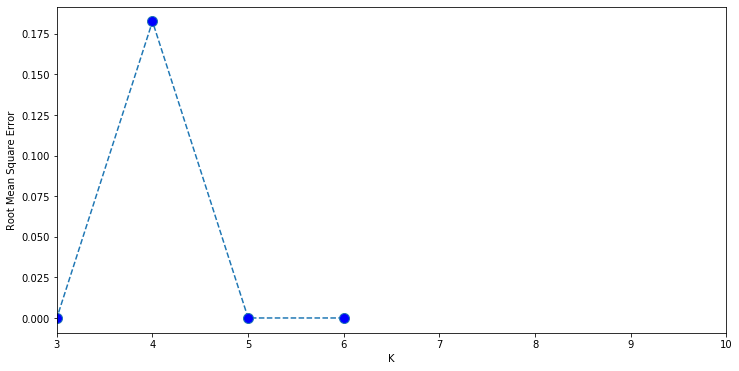

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.xlabel('K')
plt.ylabel('Root Mean Square Error')
plt.xlim([3,10])
plt.plot(test_mse,linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
